In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline


/home/negi/.virtualenvs/env1/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/negi/.virtualenvs/env1/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### `Read data`

In [2]:
##ead data
df=pd.read_csv('jester-data-1.csv',header=None)
df.head()
data=df.iloc[:1000,1:]
n,m=data.shape
#print(n,m)

### `Gauge Set creation and normalization`

In [3]:
##create gauge set G
invalid=99.00
temp=[]
mu=[]
for col in data:
    vals=list(data[col])
    if vals.count(invalid)<=10:
        temp.append(vals)
        mu.append(sum(vals)/len(vals)) #calculate mu-mean rating over all users for each item in G
G=np.array(temp).T
A=G #normalized Gauge matrix
G=pd.DataFrame(G)


In [4]:
##normalize Gauge set

for j in range(A.shape[1]):
    #variance calculation for item
    variance=0
    for raw_rating in A[:,j]:
        diff=raw_rating-mu[j]
        variance+=diff*diff
    variance/=n-1
    #normalizing raw rating in G
    k=0
    for raw_rating in A[:,j]:
        A[k][j]=(raw_rating-mu[j])/math.sqrt(variance)
        k+=1
#A=pd.DataFrame(A)
A

array([[-1.34611805, -1.81304063,  0.97463059, ..., -0.48358756,
         0.77653101,  0.33771645],
       [-0.47482448, -0.11067084, -1.00478599, ..., -0.72530061,
        -0.25581469, -0.31404809],
       [ 1.45931163,  1.71116351,  2.03614737, ...,  0.36191881,
         0.62987466,  0.67956031],
       ...,
       [ 0.504957  ,  0.68638169,  0.55210528, ..., -0.23208856,
         0.04324925, -0.21162795],
       [-0.34260484, -1.30718294, -1.26704308, ..., -0.75857285,
        -1.45638386, -1.36751242],
       [ 0.35578612,  0.67891515,  0.30858085, ...,  0.27678101,
         0.52491472,  0.15681854]])

### `PCA using Pearson's correlation coefficient`

In [5]:
##find Pearson's correlation matrix

C=np.matmul(A.T,A)/(n-1)
C

array([[ 1.        ,  0.10327305,  0.14395353,  0.10596527,  0.04856609,
         0.07493062,  0.19567325,  0.19175151,  0.18435285,  0.11720434,
         0.05023974,  0.08362557,  0.03745062,  0.08280386,  0.08337641,
         0.19249977,  0.03905127,  0.32792095,  0.04082113,  0.09405692,
         0.09823001,  0.09687369],
       [ 0.10327305,  1.        ,  0.22517141,  0.20266753,  0.19876671,
         0.21824452,  0.19009947,  0.19437793,  0.30481104,  0.27086564,
         0.04751611,  0.13729134,  0.04969601,  0.11485869,  0.10483848,
        -0.00785227,  0.10340751,  0.08049652,  0.00885014,  0.09007988,
         0.08968209,  0.09287266],
       [ 0.14395353,  0.22517141,  1.        ,  0.23359621,  0.18288661,
         0.18802959,  0.17384347,  0.17968823,  0.10355826,  0.15594568,
         0.05559589,  0.1344644 ,  0.0462403 ,  0.11437201,  0.06210299,
         0.02060896,  0.0481577 ,  0.0754229 ,  0.04930205,  0.05634542,
         0.09916024,  0.04180995],
       [ 0.10596527

In [6]:
##eigen analysis of Correlation matrix

# E is eigen value list
# V is eigen vector matrix--each column is a vector
E,V=np.linalg.eig(C) 

#checking eigen analysis--(Correlation matrix*eigen vector=eigen value*eigen vector)- must be true
for i in range(V.shape[1]):
    LHS=np.matmul(C,V[:,i].T)
    RHS=np.array([E[i]*v for v in V[:,i]])
    if np.array_equal(LHS,RHS):
        print('Eigen values are incorrect')

#print(LHS,RHS)
for i in range(V.shape[1]):
    #print('eigen value=',E[i],'\n','eigen vector=',V[:,i])
    #print()
    pass
V


array([[-9.62147598e-02, -2.00736574e-01, -2.48395952e-02,
        -5.61737947e-01, -3.94649215e-01, -1.25139937e-01,
         3.74784882e-02,  7.03312942e-02,  2.11997012e-01,
         3.39091405e-01, -1.79423441e-02,  7.09733180e-02,
         2.00650638e-01, -1.65183915e-02, -1.77721582e-01,
         1.86903674e-01, -7.32455234e-02, -5.55804980e-02,
        -1.60146064e-01, -2.89620460e-01, -1.92541902e-01,
         1.70681861e-01],
       [-8.85869368e-02, -3.55722158e-01,  6.49038161e-02,
         9.14628339e-02,  1.44152279e-01,  8.48253224e-02,
         6.57553154e-02,  3.14987526e-02, -3.23477739e-02,
         2.85073516e-02,  1.44395052e-01, -1.10592946e-01,
        -3.54344307e-01,  7.71292535e-02, -7.49357162e-02,
        -1.67927164e-01, -4.17626645e-01,  3.87663945e-02,
         1.52113347e-01, -2.85212983e-01,  2.29031900e-01,
         5.35374767e-01],
       [-7.70168465e-02, -2.91891041e-01,  1.05618267e-01,
         1.89273855e-01, -2.54368840e-01,  1.84309972e-02,
    

In [7]:
##Dimension reduction

#sorting eigen vectors w.r.t eigen values
eigen_pairs=[(np.abs(E[i]),V[:,i]) for i in range(V.shape[0])]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

#reducing to 2 dimensions, so picking top 2 values in sorted list
D=2
selected=[eigen_pairs[i][1] for i in range(D)]
W = np.vstack(tuple(selected)).T 
print('Tranforming Matrix W:\n',W)


Tranforming Matrix W:
 [[-0.09621476 -0.20073657]
 [-0.08858694 -0.35572216]
 [-0.07701685 -0.29189104]
 [-0.08168852 -0.26076416]
 [-0.06253752 -0.27185711]
 [-0.03963389 -0.32470934]
 [-0.05691941 -0.27058795]
 [-0.09346063 -0.32684755]
 [-0.10505504 -0.34101102]
 [-0.08679973 -0.31023498]
 [-0.21295737  0.0582576 ]
 [-0.3292838   0.07411597]
 [-0.34920006  0.15305795]
 [-0.32894167  0.04870504]
 [-0.3296579   0.10066626]
 [-0.3014083   0.15918335]
 [-0.23809754  0.07101045]
 [-0.28707857  0.00837596]
 [-0.30703953  0.12373716]
 [-0.16764734 -0.03356498]
 [-0.16478479 -0.11629157]
 [-0.24936417  0.05302304]]


In [8]:
##transforming data samples(the Normalized Gauge set)

def PCA(row):
    return np.matmul(W.T,row)
    
transformed=A
transformed=np.apply_along_axis( PCA, axis=1, arr=transformed )
#print(transformed.shape)
print(transformed)

[[ 0.92156581  3.71026763]
 [ 1.28754249 -1.21376506]
 [-2.5878673  -2.67234142]
 ...
 [-0.06952503 -1.2986504 ]
 [ 3.92732725  2.07970494]
 [-0.25364919 -0.94538103]]


### `Visualing data after PCA`

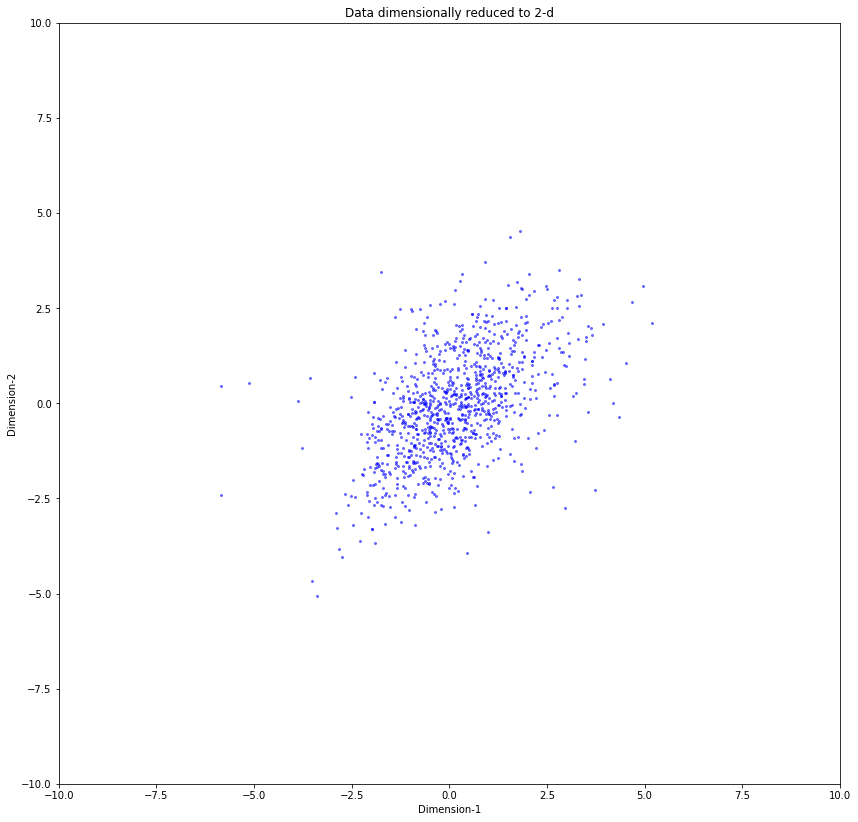

In [9]:
##visualizing data in eigen space(2D)

plt.figure(figsize=(14,14))
plt.plot(transformed[:,0], transformed[:,1], 'o', markersize=2, color='blue', alpha=0.5)
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.xlabel('Dimension-1')
plt.ylabel('Dimension-2')
plt.title('Data dimensionally reduced to 2-d')
plt.show()

> **Data is dense. Visual patterns not detected.**

### `Clustering users by Kmeans`

In [10]:
##clustering data--KMEANS

import sys
doc_dist=[]

def converge(a,b):
    for c1,c2 in zip(a,b):
        if set(c1)==set(c2):
            return True
    return False

def iterate(cent_doc):
    Clusters=[[] for i in range(K)]
    status={i:0 for i in range(N)}
    for i,doc in enumerate(cent_doc):
        if status[i]==0:
            Min=min(doc)
            cno=doc.tolist().index(Min)
            Clusters[cno].append(i)
    return Clusters

def centroidDocMatrix(centroids):
    cent_doc=[]
    for a in occur:
        temp=[]
        for b in centroids:
            dist=manhatten(a,b)
            temp.append(dist)
        cent_doc.append(temp)
    cent_doc=np.array(cent_doc)
    return cent_doc

def findCentroids(Clusters):
    centroids=[]
    for cluster in Clusters:
        d=np.zeros(D,dtype=np.float64)
        
        for doc in cluster:
            d+=occur[doc]
        d/=D
        centroids.append(d)
    return centroids

def firstClustering(a):
    Clusters=[]
    status={i:0 for i in range(N)}
    for i in range(K):
        Clusters.append([i])
        status[i]=1
    neighbours=[i for i in range(K)]

    for doc in range(K,N):
        if status[doc]==1:
            continue
        vals=[a[doc][i] for i in neighbours]
        Min=min(vals)
        new=vals.index(Min)
        for cluster in Clusters:
            if new in cluster:
                cluster.append(doc)
                status[doc]=1
    return Clusters

def manhatten(a,b):
    diff=np.abs(a-b)
    dist=0
    for i in diff.ravel():
        dist+=i
    return dist


def createDocDistMatrix():
    global doc_dist
    for a in occur:
        temp=[]
        for b in occur:
            dist=manhatten(a,b)
            temp.append(dist)
        doc_dist.append(temp)
    doc_dist=np.array(doc_dist)
    #print(doc_dist)
    #sys.exit(0)


In [11]:
K=40
N=n
occur=transformed
createDocDistMatrix()
Clusters=firstClustering(doc_dist)
itr=0
m=2

while(1):
    itr+=1
    centroids=findCentroids(Clusters)
    cent_doc=centroidDocMatrix(centroids)
    old=Clusters
    Clusters=iterate(cent_doc)
    if converge(Clusters,old) or itr==m:
        break
print(Clusters)

[[0, 3, 5, 7, 8, 10, 12, 15, 18, 19, 20, 21, 23, 24, 26, 27, 29, 31, 33, 35, 37, 39, 40, 42, 43, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 61, 62, 63, 64, 65, 66, 68, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 83, 84, 85, 87, 89, 90, 91, 92, 93, 95, 96, 98, 99, 101, 102, 103, 104, 105, 107, 108, 110, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 128, 129, 130, 132, 134, 135, 138, 139, 141, 142, 143, 144, 147, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 180, 181, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 201, 202, 203, 204, 206, 208, 210, 211, 212, 214, 218, 220, 222, 223, 225, 229, 230, 233, 234, 235, 236, 237, 238, 239, 240, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 269, 271, 273, 274, 275, 276, 278, 279, 280, 281, 282, 283, 284, 286, 288, 290, 291, 293, 295, 296, 299, 3

In [12]:
from sklearn.cluster import KMeans
X=transformed
km=KMeans(n_clusters=40, random_state=1).fit(X)
y_pred=km.labels_


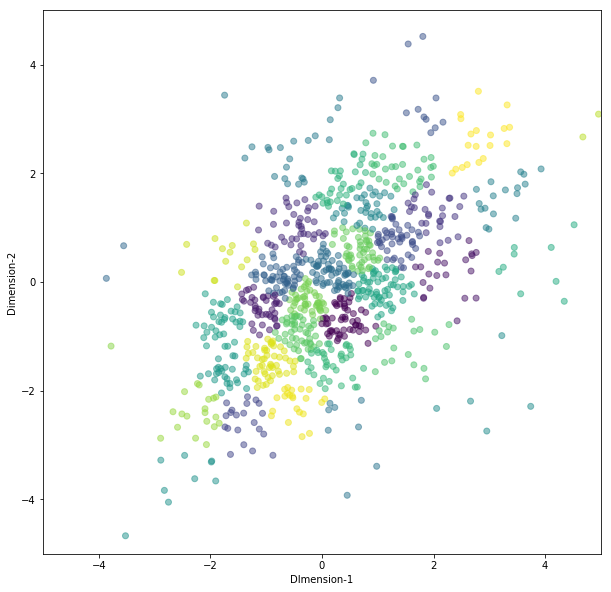

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=y_pred,alpha=0.5)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('DImension-1')
plt.ylabel('Dimension-2')
plt.show()